### Import Data and Libraries

In [10]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run utils.ipynb

In [11]:
dos_df_path,fuzzy_df_path,attack_free_df_path=load_data_paths_from_config_to_notebooks("out_paths")


In [12]:
dos_df_pl = pl.read_csv(dos_df_path)
fuzzy_df_pl= pl.read_csv(fuzzy_df_path)
attack_free_df_pl= pl.read_csv(attack_free_df_path)

In [13]:
dos_df_pd = dos_df_pl.to_pandas()
fuzzy_df_pd=fuzzy_df_pl.to_pandas()
attack_free_df_pd=attack_free_df_pl.to_pandas()

### Common Methods

In [14]:
def plot_distribution_of_numeric_variable(df,column_name):
    # 1. Distribution of `updatedCanId`
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column_name, data=df, palette='viridis')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### DoS

In [15]:
dos_df_pl.head()

datetime,updatedCanId,dlc,message,updatedFlag
str,i64,i64,str,str
"""2016-11-03T18:39:36.000000""",399,8,"""fe5b0000003c0000""","""R"""
"""2016-11-03T18:39:36.000000""",608,8,"""19212230088e6d3a""","""R"""
"""2016-11-03T18:39:36.000000""",672,8,"""64009a1d9702bd00""","""R"""
"""2016-11-03T18:39:36.000000""",809,8,"""40bb7f1411200014""","""R"""
"""2016-11-03T18:39:36.000000""",1349,8,"""d800008a00000000""","""R"""


#### updatedCanId

C:\Users\Naz\AppData\Local\Temp\ipykernel_19480\142966034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette='viridis')


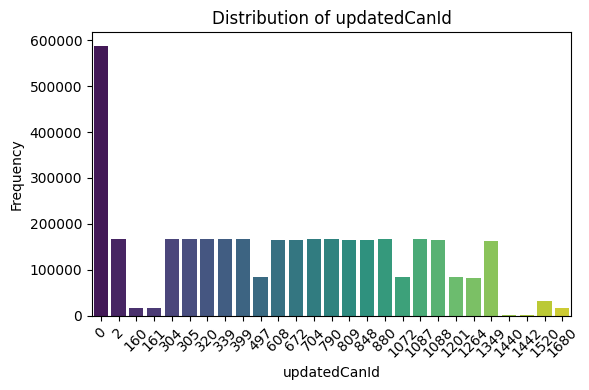

In [16]:
plot_distribution_of_numeric_variable(dos_df_pd,"updatedCanId")

#### dlc

C:\Users\Naz\AppData\Local\Temp\ipykernel_19480\142966034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette='viridis')


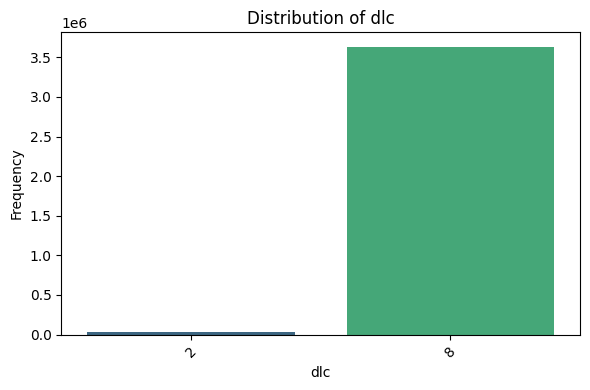

In [17]:
plot_distribution_of_numeric_variable(dos_df_pd,"dlc")

In [21]:
dos_df_pl["dlc"].value_counts()

dlc,count
i64,u32
8,3634582
2,31188


#### datetime

Text(0, 0.5, 'Classes')

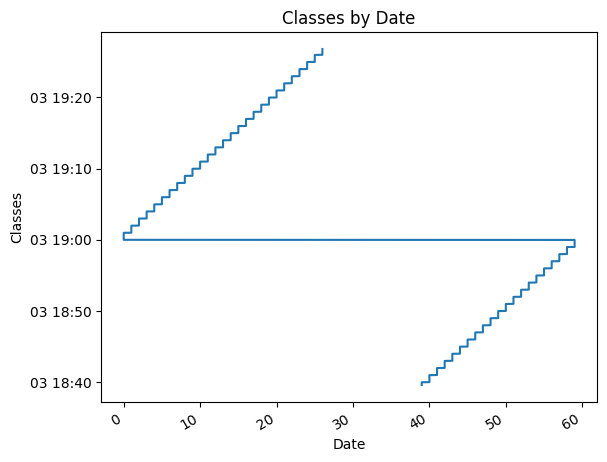

In [26]:
dos_df_pd['datetime'] = pd.to_datetime(dos_df_pd['datetime'])
plt.plot(dos_df_pd['datetime'].dt.minute , dos_df_pd['datetime'])
 
# Giving title to the chart using plt.title
plt.title('Classes by Date')
 
# rotating the x-axis tick labels at 30degree 
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Classes')
